In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Sparkling.csv')
df.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [4]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [5]:
# Adding the time stamp to the data frame
df['Time_Stamp'] = pd.DataFrame(date)
df.head()

,YearMonth,Sparkling,Time_Stamp
0,1980-01,1686,1980-01-31
1,1980-02,1591,1980-02-29
2,1980-03,2304,1980-03-31
3,1980-04,1712,1980-04-30
4,1980-05,1471,1980-05-31


In [6]:
df= df.drop('YearMonth',axis=1)

In [7]:
df.set_index('Time_Stamp',inplace=True)
df.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [8]:
df.tail()

,Sparkling
Time_Stamp,
1995-03-31,1897
1995-04-30,1862
1995-05-31,1670
1995-06-30,1688
1995-07-31,2031


In [9]:
df.isnull().sum()

Sparkling    0
dtype: int64

# Plot the Time Series to understand the behaviour of the data.

In [10]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

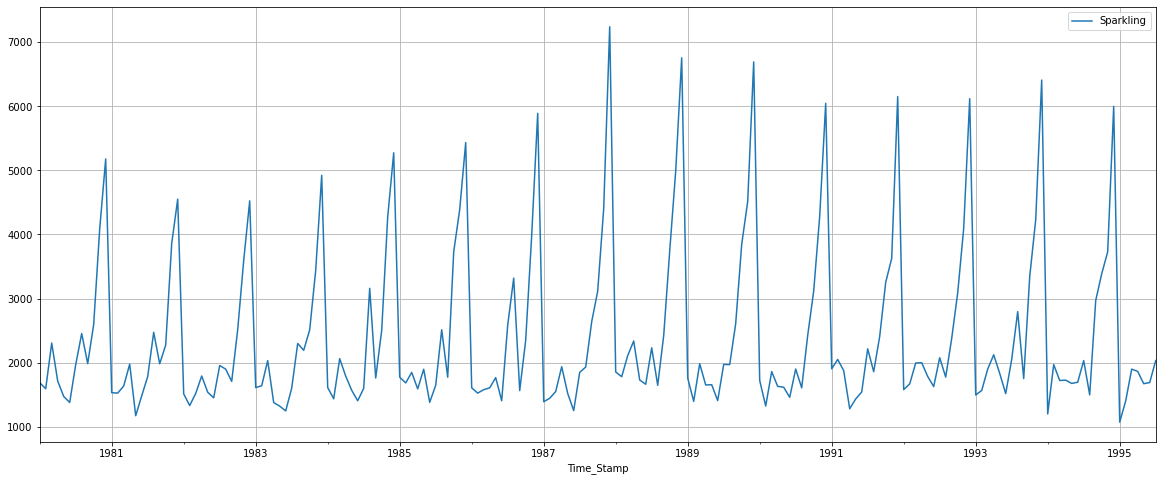

In [11]:
df.plot()
plt.grid();

In [12]:
df.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


# Plot a boxplot to understand the spread of accidents across different years and within different months across years.

Yearly Boxplot

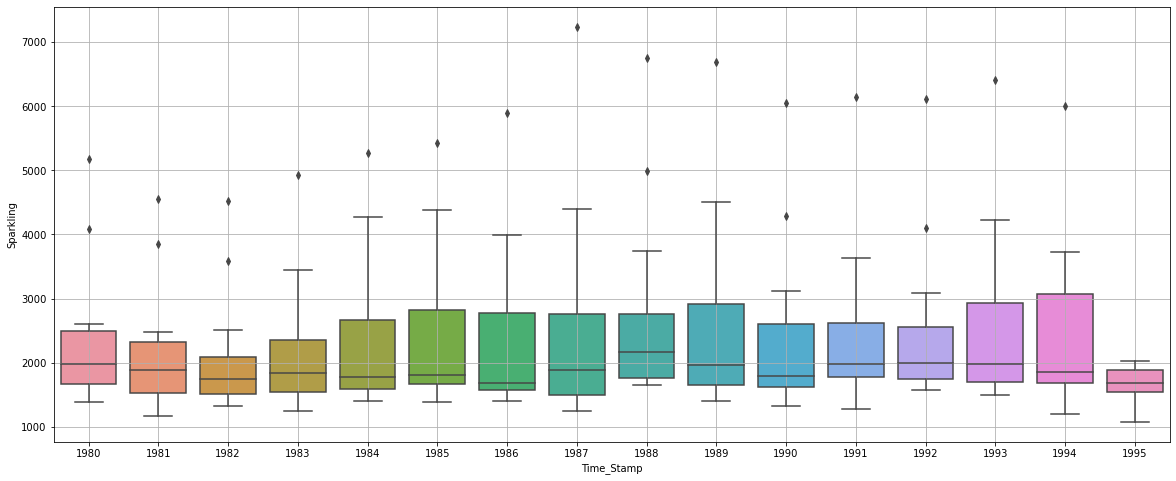

In [14]:
sns.boxplot(x = df.index.year,y = df['Sparkling'])
plt.grid();

Monthly Plot

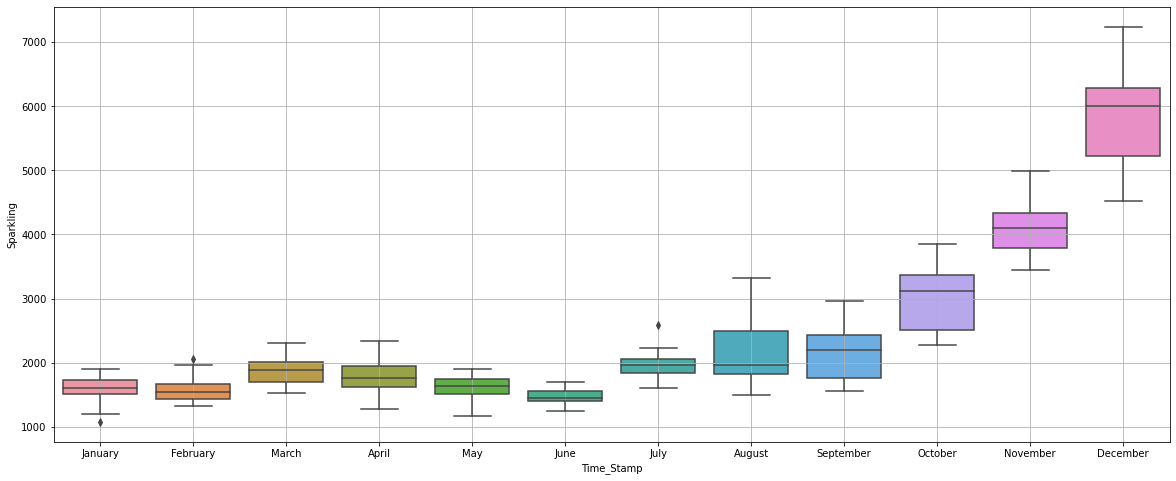

In [15]:
sns.boxplot(x = df.index.month_name(),y = df['Sparkling'])
plt.grid();

# Plot a time series monthplot to understand the spread of accidents across different years and within different months across years.¶

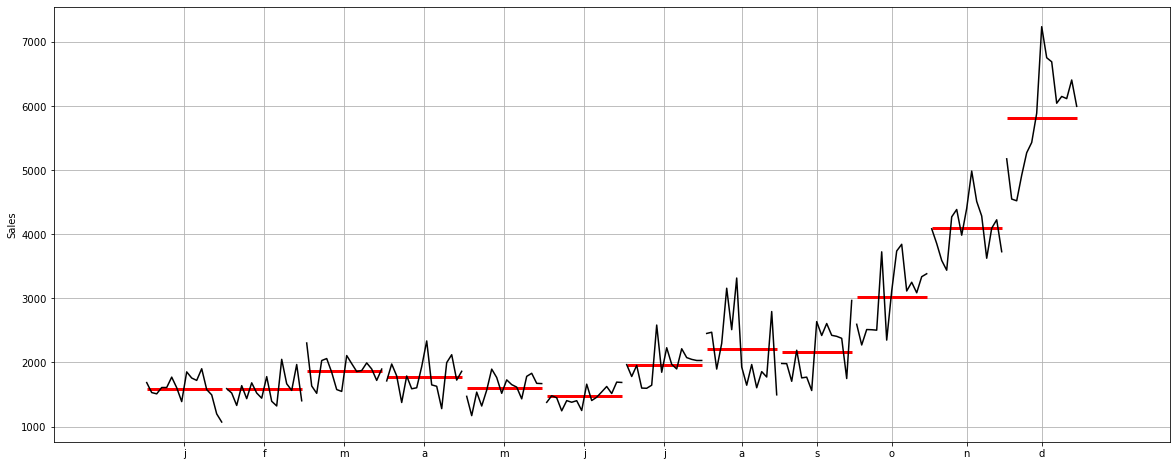

In [16]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['Sparkling'],ylabel='Sales')
plt.grid();

# Plot a graph of monthly RetailSales across years.

In [17]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


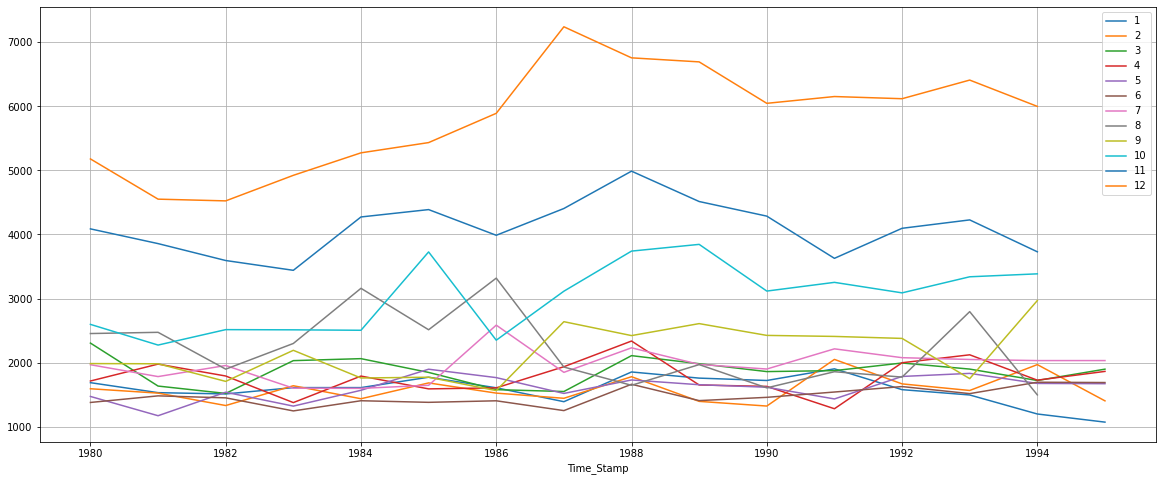

In [18]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

# Plot the Empirical Cumulative Distribution.

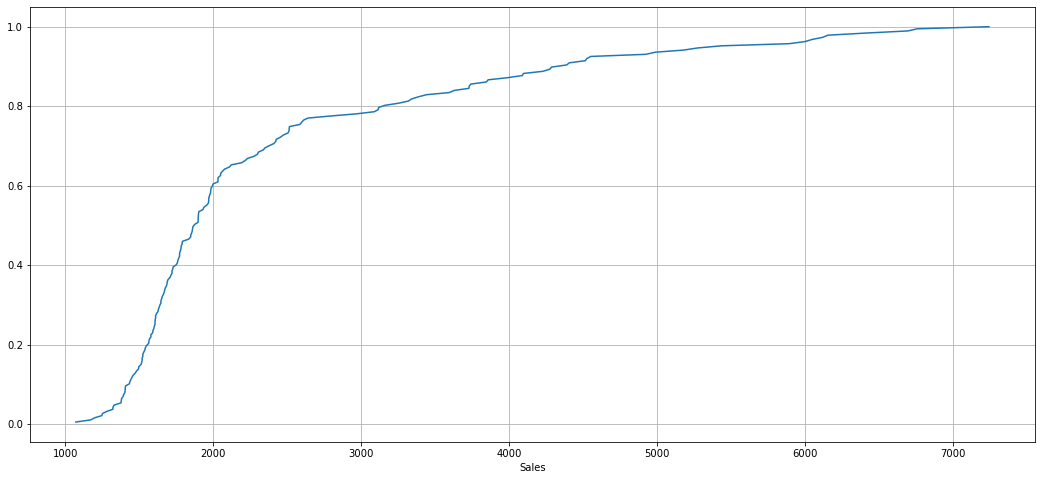

In [19]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

# Plot the average RetailSales per month and the month on month percentage change of RetailSales.

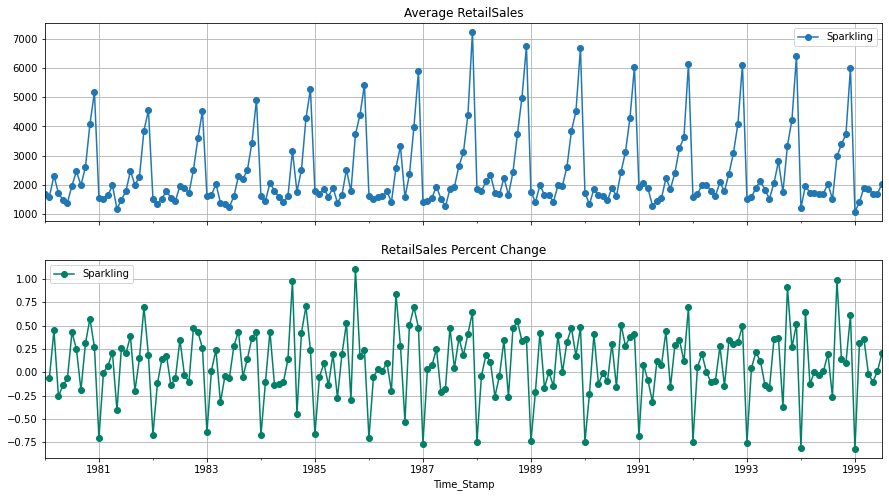

In [20]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average RetailSales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="RetailSales Percent Change",grid=True)

# Decompose the Time Series and plot the different components.

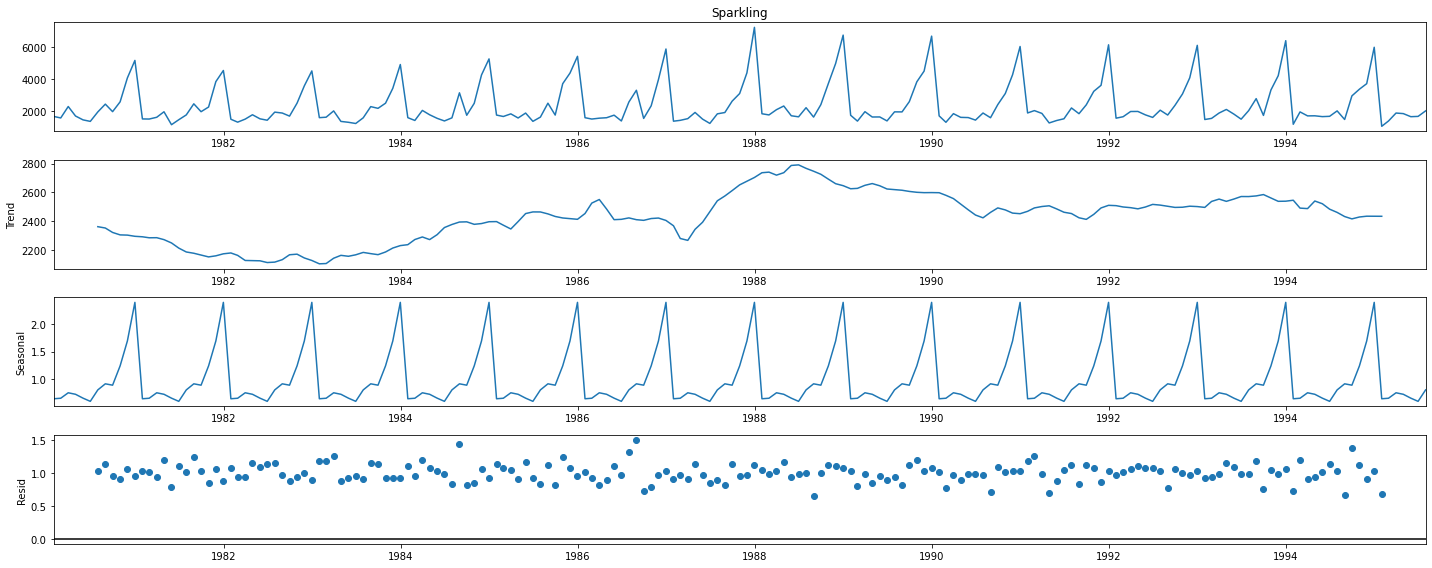

In [28]:
decomposition = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition.plot();

In [29]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

In [30]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

# Additive Decomposition

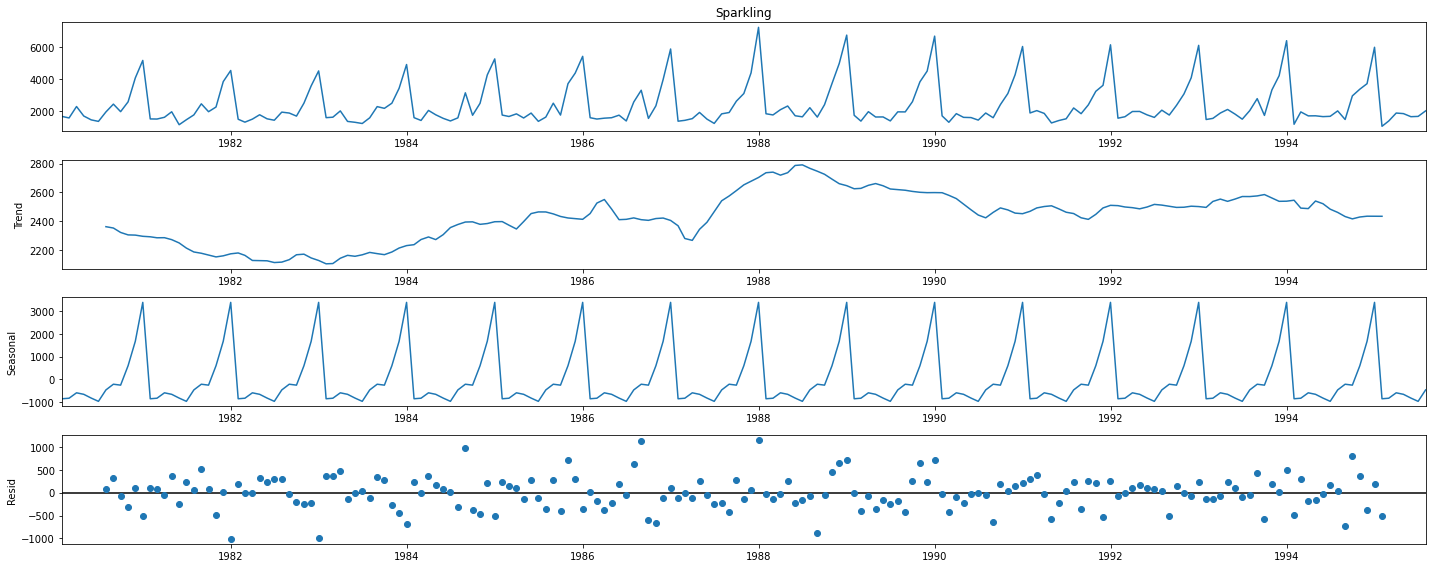

In [31]:
decomposition = seasonal_decompose(df['Sparkling'],model='additive')
decomposition.plot();

In [26]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.3532

# Check for stationarity of the whole Time Series data.

In [32]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

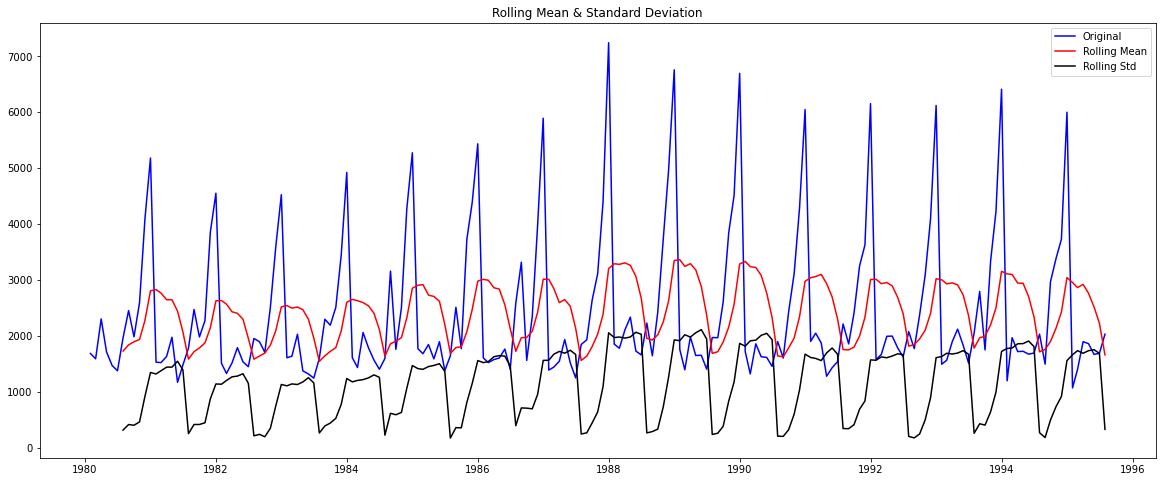

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [33]:
test_stationarity(df['Sparkling'])

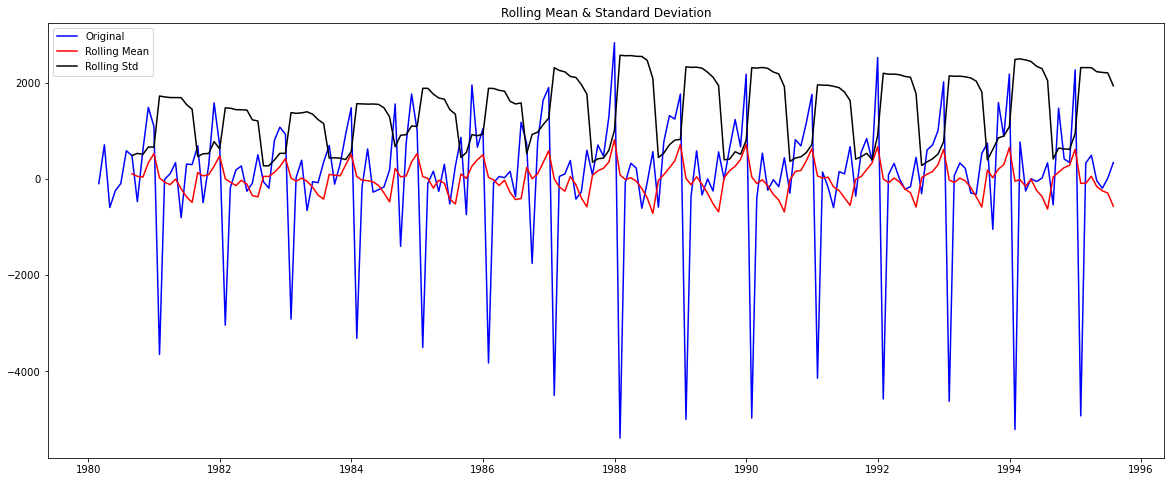

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [34]:
test_stationarity(df['Sparkling'].diff().dropna())

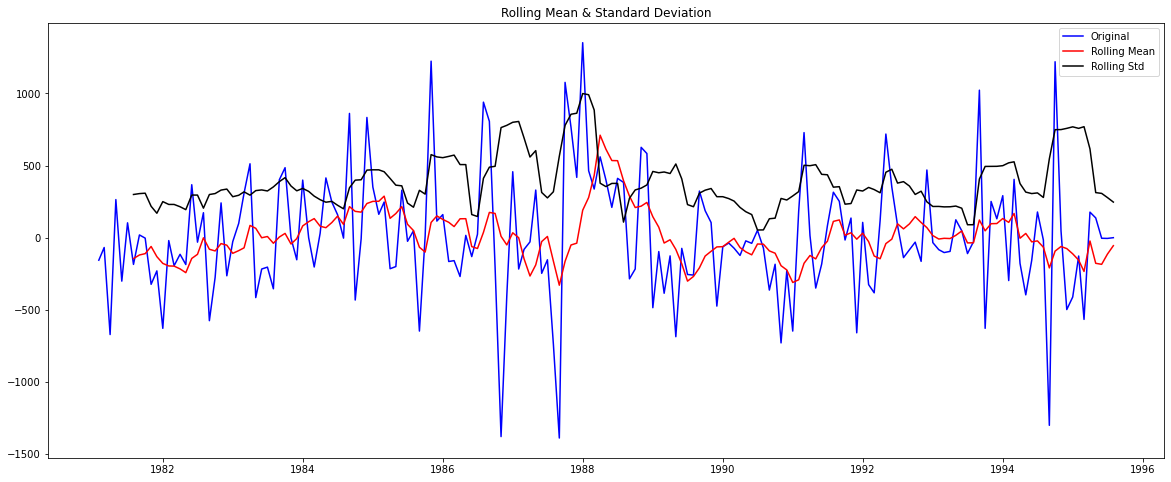

Results of Dickey-Fuller Test:
Test Statistic                  -4.460165
p-value                          0.000232
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64 



In [35]:
test_stationarity(df['Sparkling'].diff(12).dropna())

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

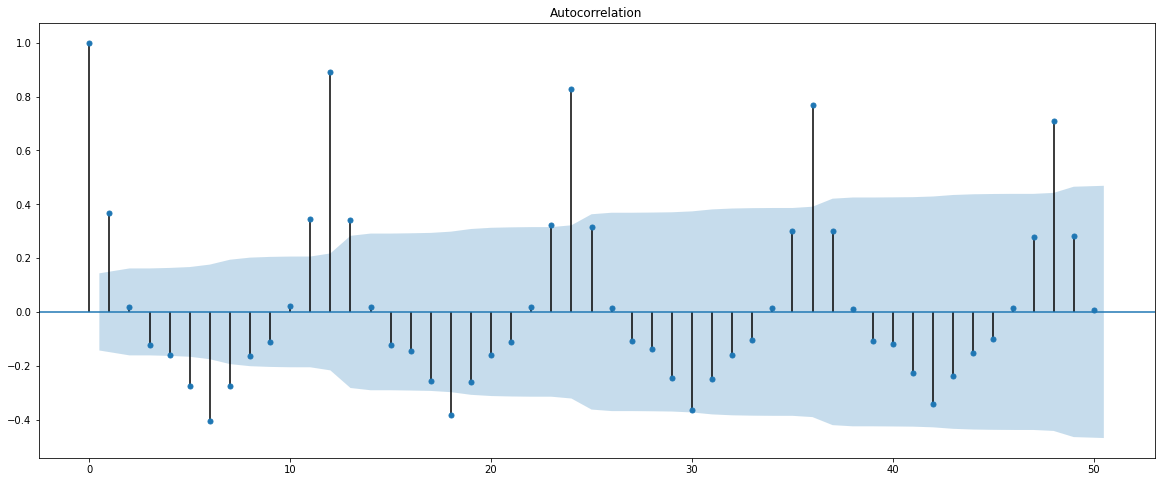

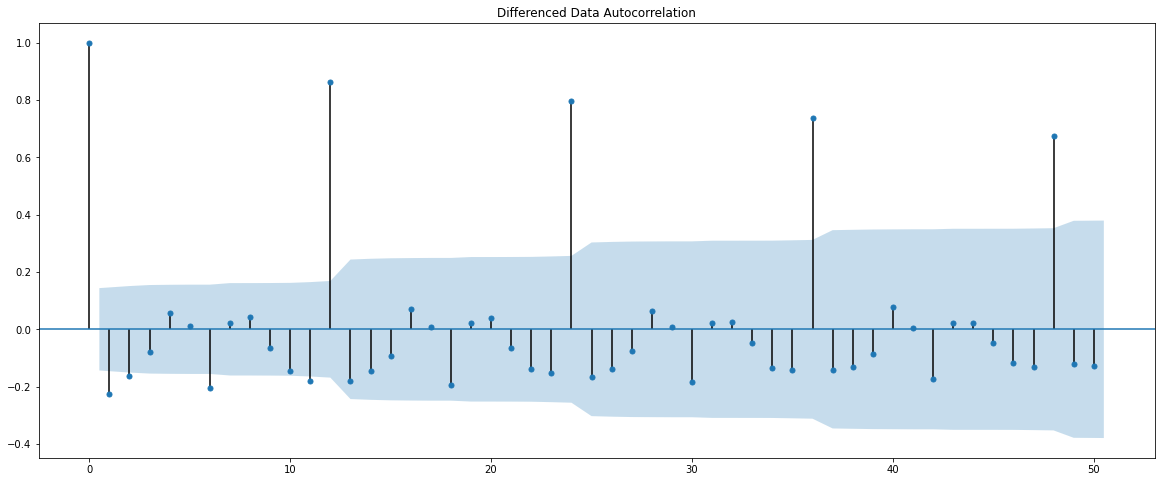

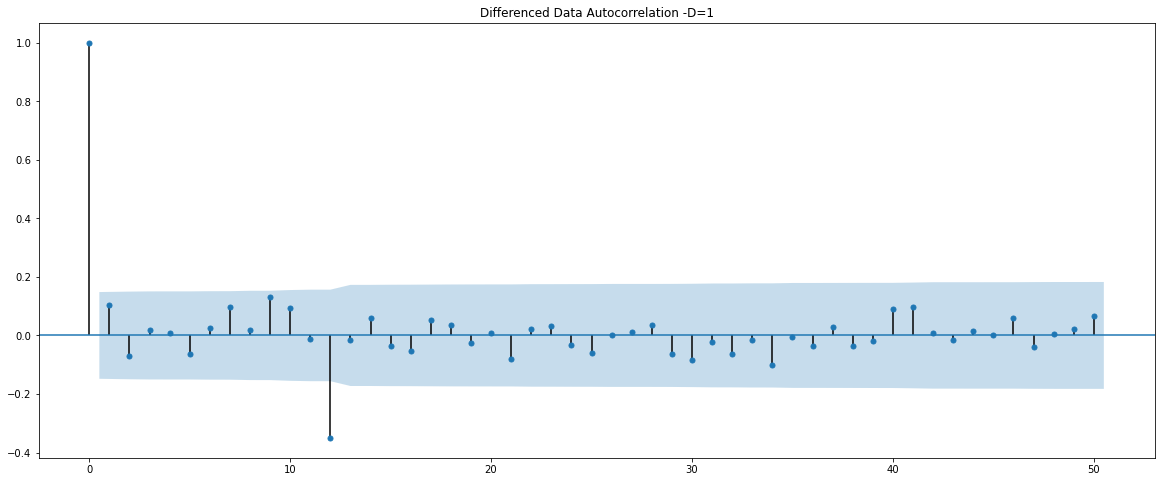

In [40]:
plot_acf(df['Sparkling'],lags=50)
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_acf(df['Sparkling'].diff(12).dropna(),lags=50,title='Differenced Data Autocorrelation -D=1')
plt.show()

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


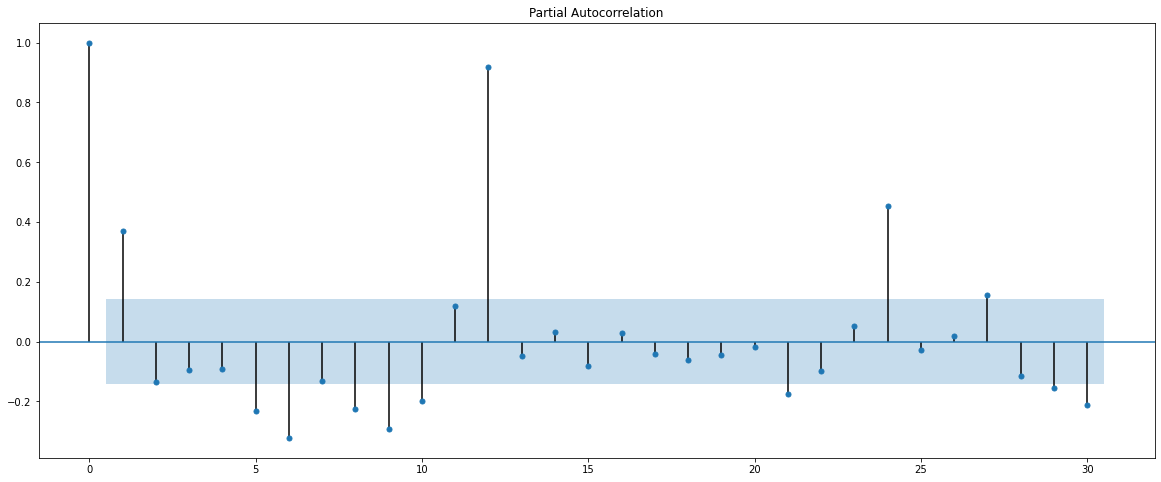

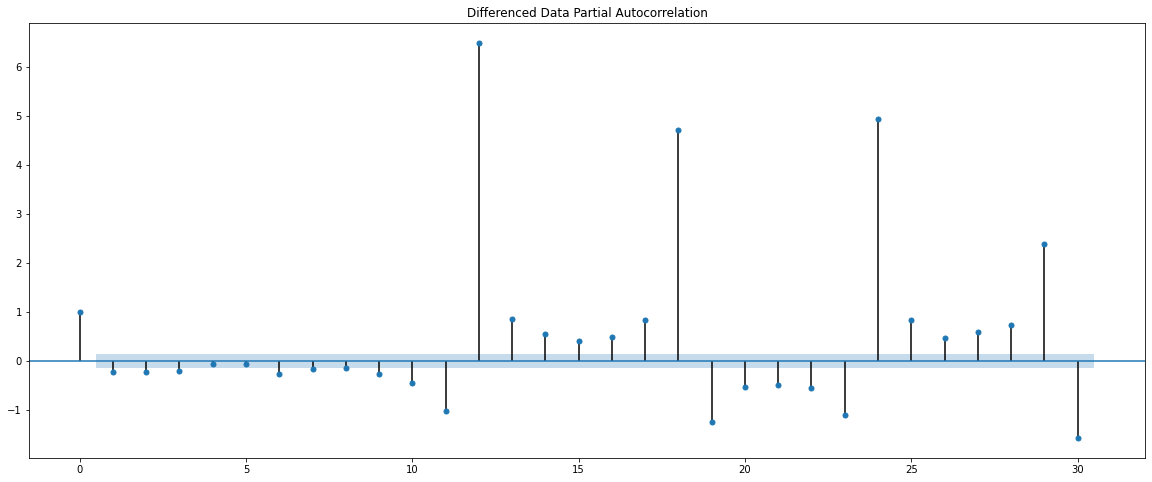

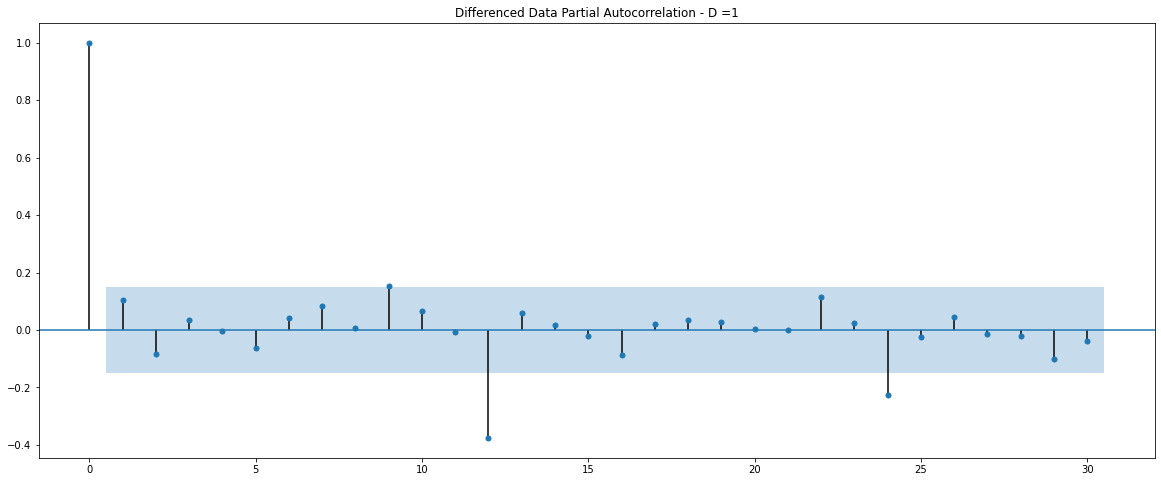

In [42]:
plot_pacf(df['Sparkling'],lags=30)
plot_pacf(df['Sparkling'].diff().dropna(),lags=30,title='Differenced Data Partial Autocorrelation')
plot_pacf(df['Sparkling'].diff(12).dropna(),lags=30,title='Differenced Data Partial Autocorrelation - D =1')
plt.show()

In [43]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [44]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [45]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


Last few rows of Training Data


,Sparkling
Time_Stamp,
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116
1990-11-30,4286
1990-12-31,6047


First few rows of Test Data


,Sparkling
Time_Stamp,
1991-01-31,1902
1991-02-28,2049
1991-03-31,1874
1991-04-30,1279
1991-05-31,1432


Last few rows of Test Data


,Sparkling
Time_Stamp,
1995-03-31,1897
1995-04-30,1862
1995-05-31,1670
1995-06-30,1688
1995-07-31,2031


In [46]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


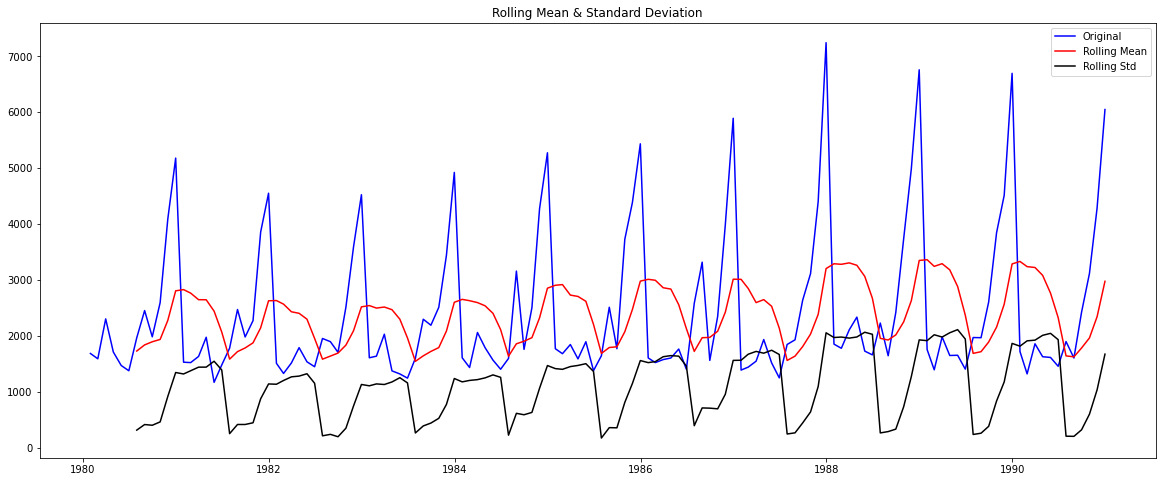

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [47]:
test_stationarity(train['Sparkling'])

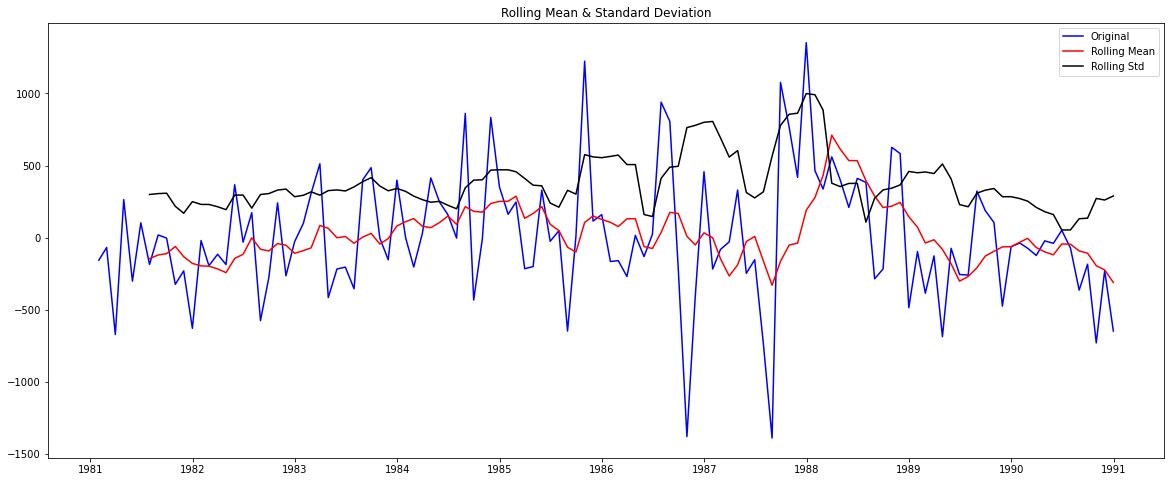

Results of Dickey-Fuller Test:
Test Statistic                  -3.136812
p-value                          0.023946
#Lags Used                      11.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [50]:
test_stationarity(train['Sparkling'].diff(12).dropna())

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


# Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

In [52]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [53]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [54]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.906437173329
ARIMA(0, 1, 2) - AIC:2232.783097684734
ARIMA(1, 1, 0) - AIC:2268.5280606863257
ARIMA(1, 1, 1) - AIC:2235.0139453501597
ARIMA(1, 1, 2) - AIC:2233.597647119585
ARIMA(2, 1, 0) - AIC:2262.035600081614
ARIMA(2, 1, 1) - AIC:2232.3604898890007
ARIMA(2, 1, 2) - AIC:2210.62306717763


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


In [55]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(2, 1, 2)",2210.623067
7,"(2, 1, 1)",2232.360490
2,"(0, 1, 2)",2232.783098
5,"(1, 1, 2)",2233.597647
4,"(1, 1, 1)",2235.013945
6,"(2, 1, 0)",2262.035600
1,"(0, 1, 1)",2264.906437
3,"(1, 1, 0)",2268.528061
0,"(0, 1, 0)",2269.582796


In [56]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.312
Method:                       css-mle   S.D. of innovations           1013.526
Date:                Mon, 07 Sep 2020   AIC                           2210.623
Time:                        19:47:20   BIC                           2227.874
Sample:                    02-29-1980   HQIC                          2217.633
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5837      0.519     10.757      0.000       4.566       6.601
ar.L1.D.Sparkling     1.2699      0.075     17.042      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


# Predict on the Test Set using this model and evaluate the model.

In [57]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [68]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1374.1109222333473


In [69]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

,RMSE
"ARIMA(2,1,2)",1374.110922


# Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots once more.

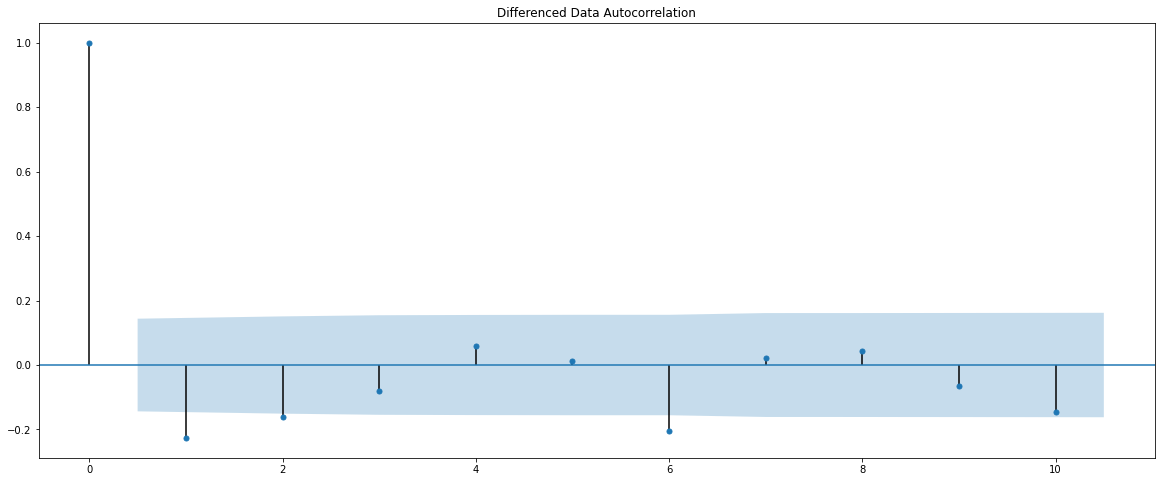

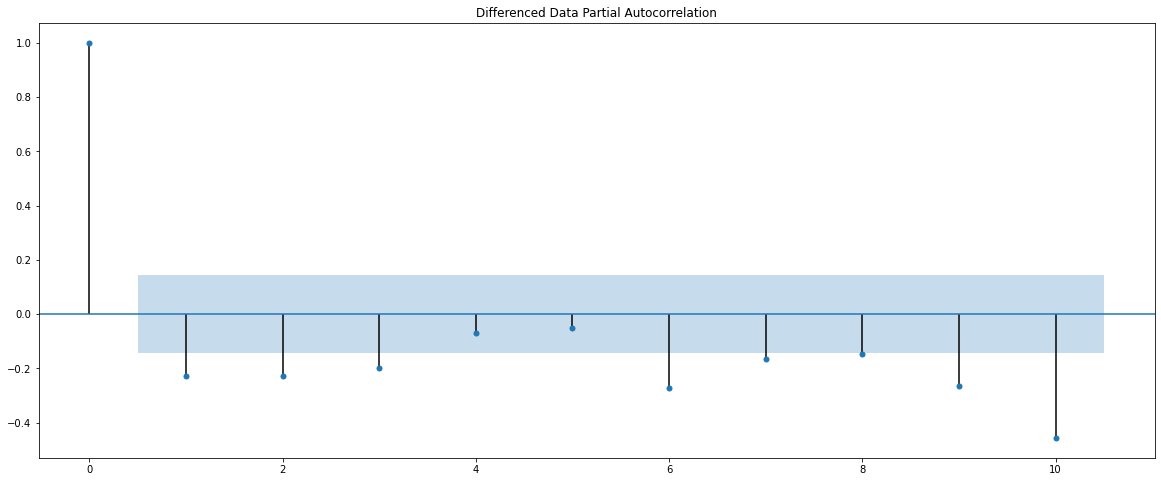

In [61]:
plot_acf(df['Sparkling'].diff().dropna(),lags=10,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=10,title='Differenced Data Partial Autocorrelation')
plt.show()

In [62]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(3,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1107.464
Method:                       css-mle   S.D. of innovations           1106.081
Date:                Mon, 07 Sep 2020   AIC                           2228.927
Time:                        19:52:13   BIC                           2249.054
Sample:                    02-29-1980   HQIC                          2237.106
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.9843        nan        nan        nan         nan         nan
ar.L1.D.Sparkling    -0.4419        nan        nan        nan         nan         nan
ar.L2.D.Sparkling     0.

# Predict on the Test Set using this model and evaluate the model.

In [63]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [70]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

1378.9477279901762


In [71]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(3,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,2)",1374.110922
"ARIMA(3,1,2)",1378.947728


# Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).¶

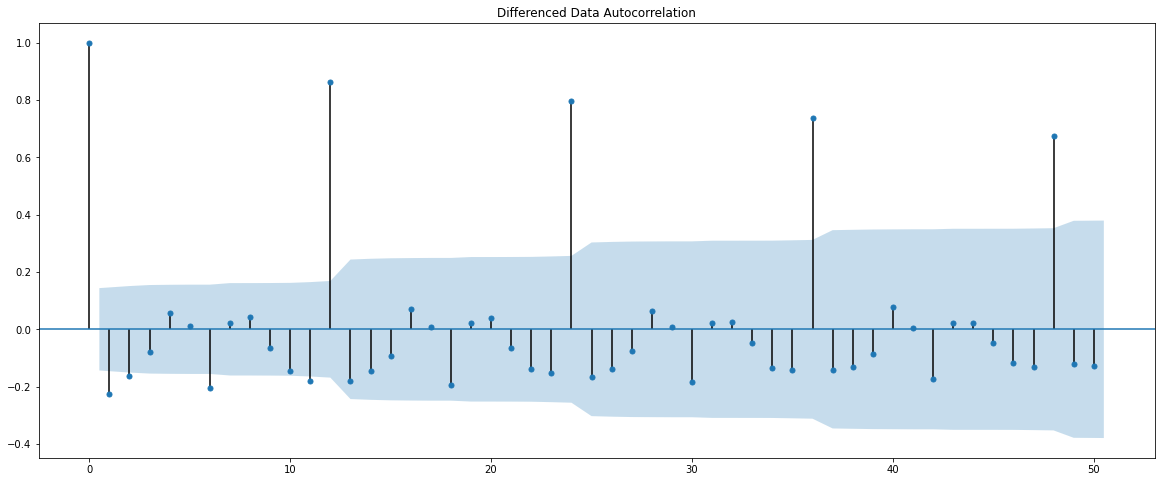

In [72]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

# Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [74]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 6)
Model: (0, 1, 2)(0, 1, 2, 6)
Model: (1, 1, 0)(1, 1, 0, 6)
Model: (1, 1, 1)(1, 1, 1, 6)
Model: (1, 1, 2)(1, 1, 2, 6)
Model: (2, 1, 0)(2, 1, 0, 6)
Model: (2, 1, 1)(2, 1, 1, 6)
Model: (2, 1, 2)(2, 1, 2, 6)


In [75]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [76]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 6)7 - AIC:2262.9835238897754
SARIMA(0, 1, 0)x(0, 1, 1, 6)7 - AIC:2018.7784206950992
SARIMA(0, 1, 0)x(0, 1, 2, 6)7 - AIC:1859.2938416074928
SARIMA(0, 1, 0)x(1, 1, 0, 6)7 - AIC:1838.4913791966653
SARIMA(0, 1, 0)x(1, 1, 1, 6)7 - AIC:1825.5404760101162
SARIMA(0, 1, 0)x(1, 1, 2, 6)7 - AIC:1717.60991981474
SARIMA(0, 1, 0)x(2, 1, 0, 6)7 - AIC:1747.6671722882743
SARIMA(0, 1, 0)x(2, 1, 1, 6)7 - AIC:1745.8846826053789
SARIMA(0, 1, 0)x(2, 1, 2, 6)7 - AIC:1721.7021506901565
SARIMA(0, 1, 1)x(0, 1, 0, 6)7 - AIC:2243.355144110004
SARIMA(0, 1, 1)x(0, 1, 1, 6)7 - AIC:1999.521048022897
SARIMA(0, 1, 1)x(0, 1, 2, 6)7 - AIC:1831.8220004633224
SARIMA(0, 1, 1)x(1, 1, 0, 6)7 - AIC:1797.8394801066288
SARIMA(0, 1, 1)x(1, 1, 1, 6)7 - AIC:1763.5428068131712
SARIMA(0, 1, 1)x(1, 1, 2, 6)7 - AIC:1654.8225411510853
SARIMA(0, 1, 1)x(2, 1, 0, 6)7 - AIC:1706.3182233098291
SARIMA(0, 1, 1)x(2, 1, 1, 6)7 - AIC:1703.6698063102444
SARIMA(0, 1, 1)x(2, 1, 2, 6)7 - AIC:1656.7125717195843
SARIMA(0, 1, 2

In [77]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
50,"(1, 1, 2)","(1, 1, 2, 6)",1640.463164
23,"(0, 1, 2)","(1, 1, 2, 6)",1640.930652
53,"(1, 1, 2)","(2, 1, 2, 6)",1642.052390
26,"(0, 1, 2)","(2, 1, 2, 6)",1642.413081
80,"(2, 1, 2)","(2, 1, 2, 6)",1643.940273


In [78]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 1, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 6)   Log Likelihood                -813.232
Date:                           Mon, 07 Sep 2020   AIC                           1640.463
Time:                                   20:00:45   BIC                           1659.367
Sample:                                        0   HQIC                          1648.130
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6515      0.274     -2.382      0.017      -1.188      -0.115
ma.L1         -0.0984      0.228     -0.431

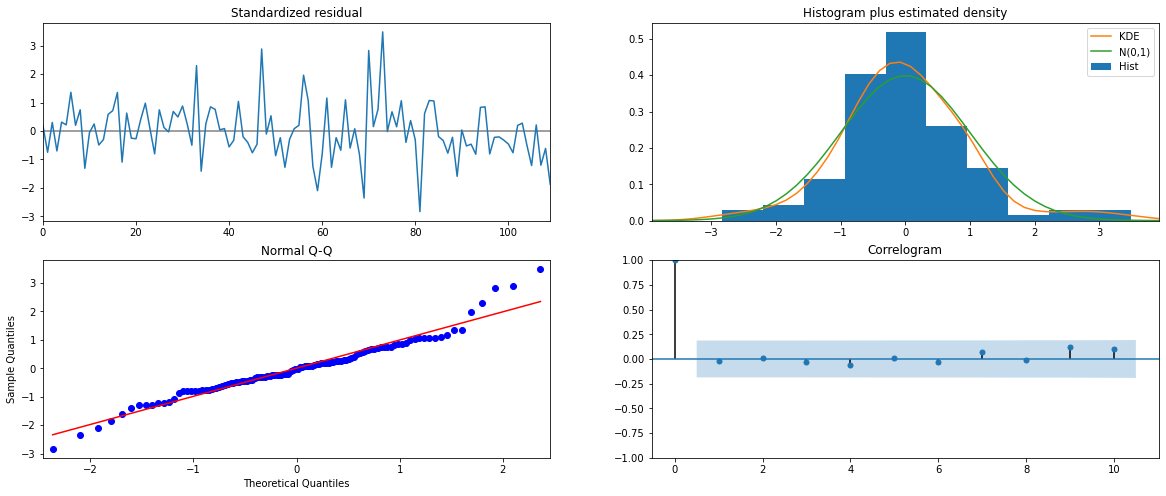

In [79]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

Predict on the Test Set using this model and evaluate the model.

In [80]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [81]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1387.387046,390.750195,621.530736,2153.243356
1,1207.458297,402.781873,418.020333,1996.896262
2,1691.421597,402.784493,901.978497,2480.864696
3,1565.188199,407.874917,765.768051,2364.608346
4,1278.476952,408.548829,477.735961,2079.217943


In [82]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

613.207861367072


In [83]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(1,1,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,2)",1374.110922
"ARIMA(3,1,2)",1378.947728
"SARIMA(1,1,2)(1,1,2,6)",613.207861


We see that we have huge gain the RMSE value by including the seasonal parameters as well.



# Setting the seasonality as 12 for the first iteration of the auto SARIMA model

In [84]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)


In [85]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [86]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1822.982485206384
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:1626.8626334544786
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:1452.6773574278266
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:1646.3778167661442
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:1628.3243908901745
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:1454.5289621896598
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:1466.6211360755017
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:1468.5000981881228
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:1456.0729761860398
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1760.6565719765833
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:1569.663923422532
SARIMA(0, 1, 1)x(0, 1, 2, 12)7 - AIC:1399.108384672881
SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC:1602.8594818913289
SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC:1570.8550259096464
SARIMA(0, 1, 1)x(1, 1, 2, 12)7 - AIC:1400.6709524025184
SARIMA(0, 1, 1)x(2, 1, 0, 12)7 - AIC:1428.2448787539263
SARIMA(0, 1, 1)x(2, 1, 1, 12)7 - AIC:1429.6168027454241
SARIMA(0, 1, 1)x(2, 1, 2, 12)7 - AIC:1402.638588959

In [87]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
47,"(1, 1, 2)","(0, 1, 2, 12)",1382.347780
20,"(0, 1, 2)","(0, 1, 2, 12)",1382.484254
50,"(1, 1, 2)","(1, 1, 2, 12)",1384.137874
74,"(2, 1, 2)","(0, 1, 2, 12)",1384.317618
23,"(0, 1, 2)","(1, 1, 2, 12)",1384.398867


In [89]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -685.174
Date:                            Mon, 07 Sep 2020   AIC                           1382.348
Time:                                    20:13:01   BIC                           1397.479
Sample:                                         0   HQIC                          1388.455
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5506      0.287     -1.921      0.055      -1.112       0.011
ma.L1         -0.1612      0.235   

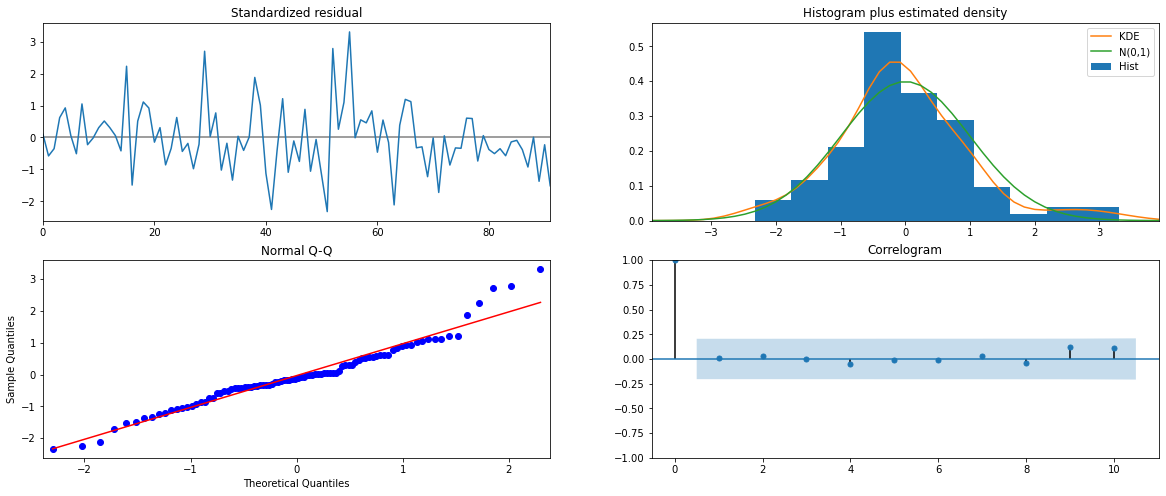

In [90]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

# Predict on the Test Set using this model and evaluate the model

In [91]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [92]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1460.250006,412.923588,650.934646,2269.565366
1,1392.437586,429.723203,550.195586,2234.679586
2,1743.215319,430.067723,900.298072,2586.132567
3,1650.067985,433.931376,799.578117,2500.557853
4,1522.668099,434.244355,671.564803,2373.771395


In [93]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

382.5674333050445


In [94]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(0,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,2)",1374.110922
"ARIMA(3,1,2)",1378.947728
"SARIMA(1,1,2)(1,1,2,6)",613.207861
"SARIMA(1,1,2)(0,1,2,12)",382.567433


# Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.


Let us look at the ACF and the PACF plots once more.

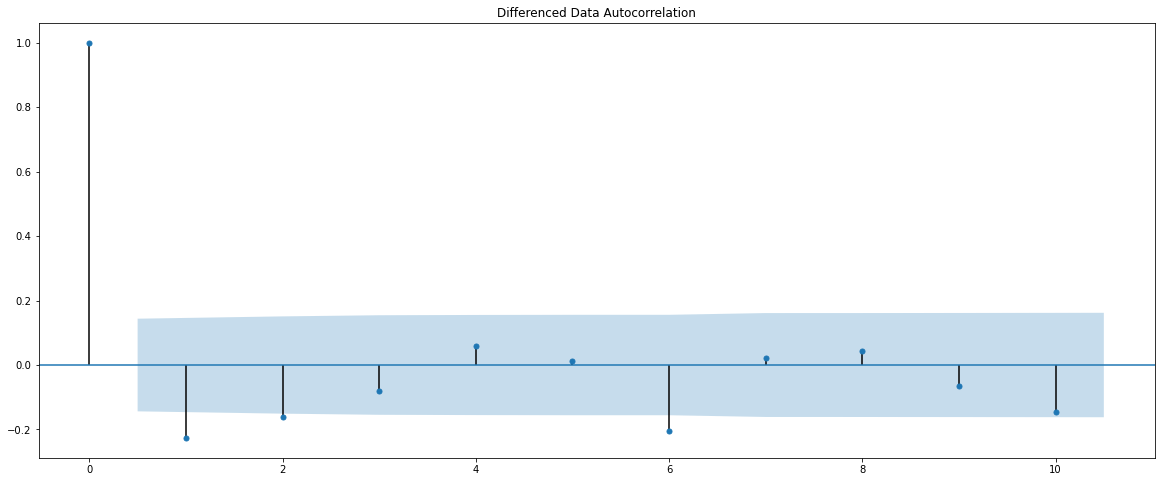

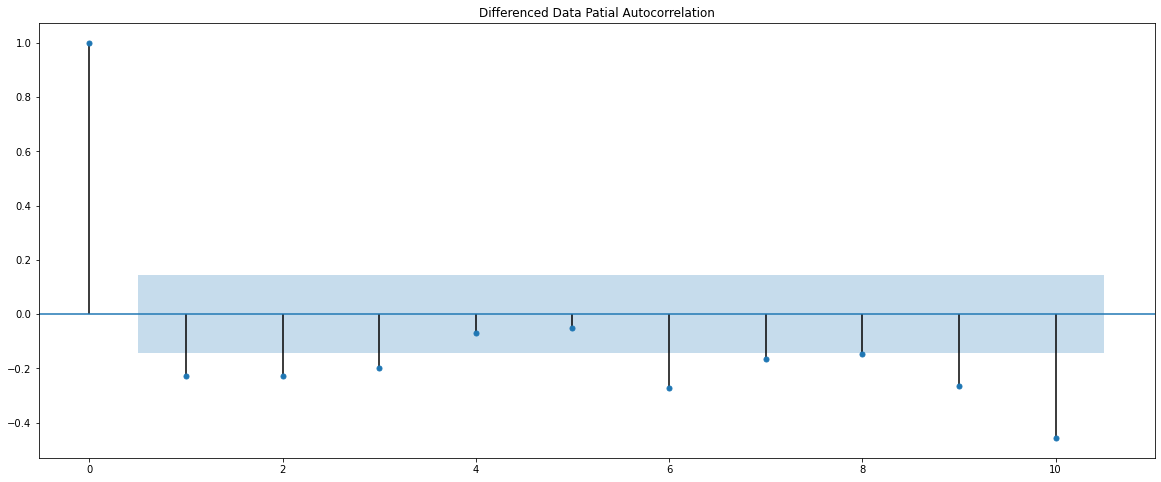

In [96]:
plot_acf(df['Sparkling'].diff().dropna(),lags=10,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=10,title='Differenced Data Patial Autocorrelation')
plt.show()

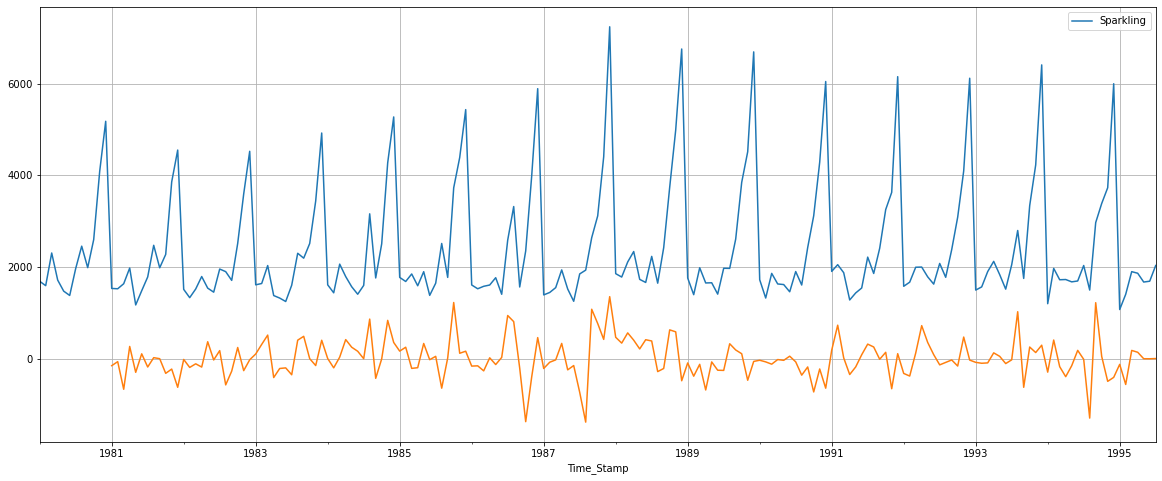

In [98]:
df.plot()
plt.grid();
(df['Sparkling'].diff(12)).plot()
plt.grid();

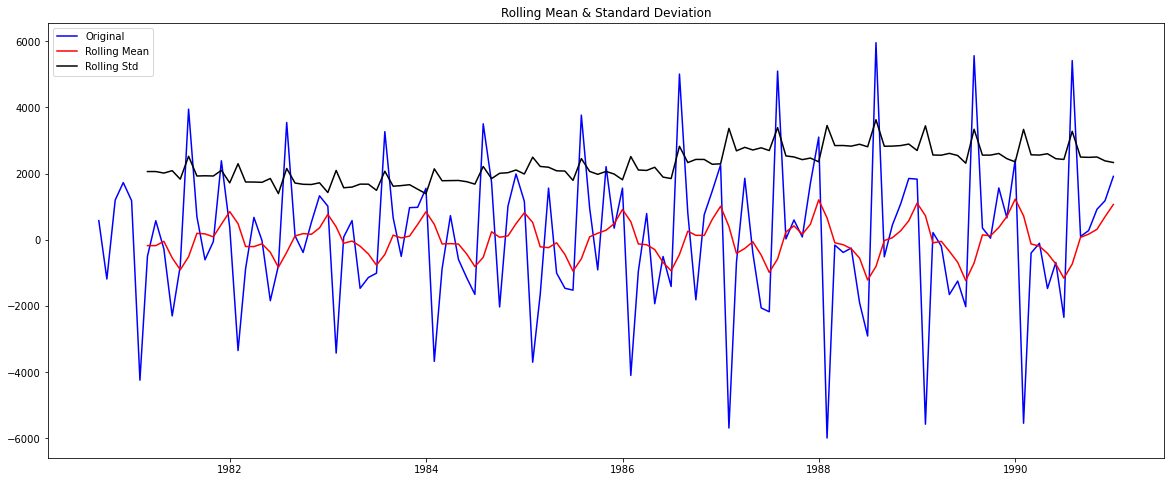

Results of Dickey-Fuller Test:
Test Statistic                -7.017242e+00
p-value                        6.683657e-10
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [99]:
test_stationarity((train['Sparkling'].diff(6).dropna()).diff(1).dropna())

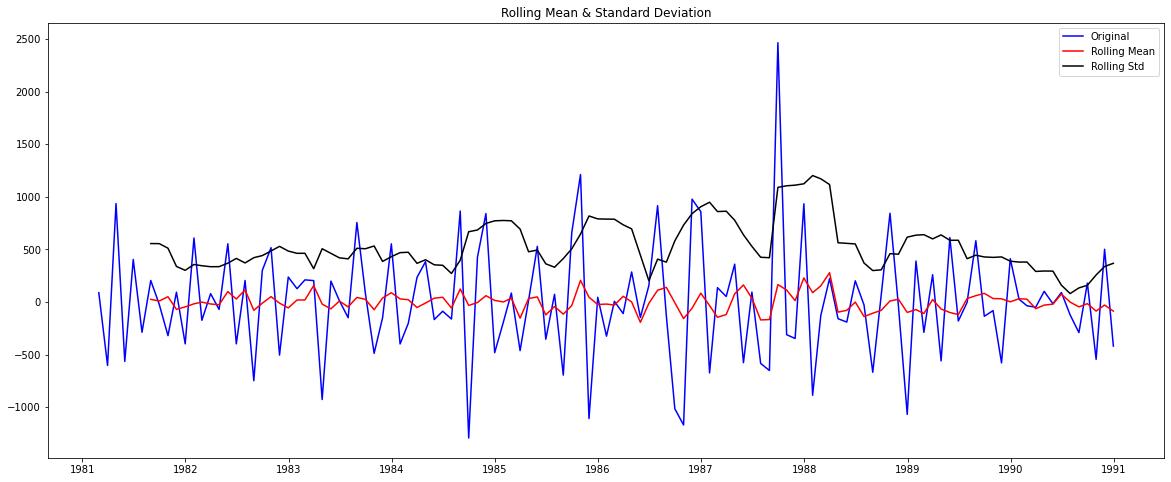

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [100]:
test_stationarity((train['Sparkling'].diff(12).dropna()).diff(1).dropna())

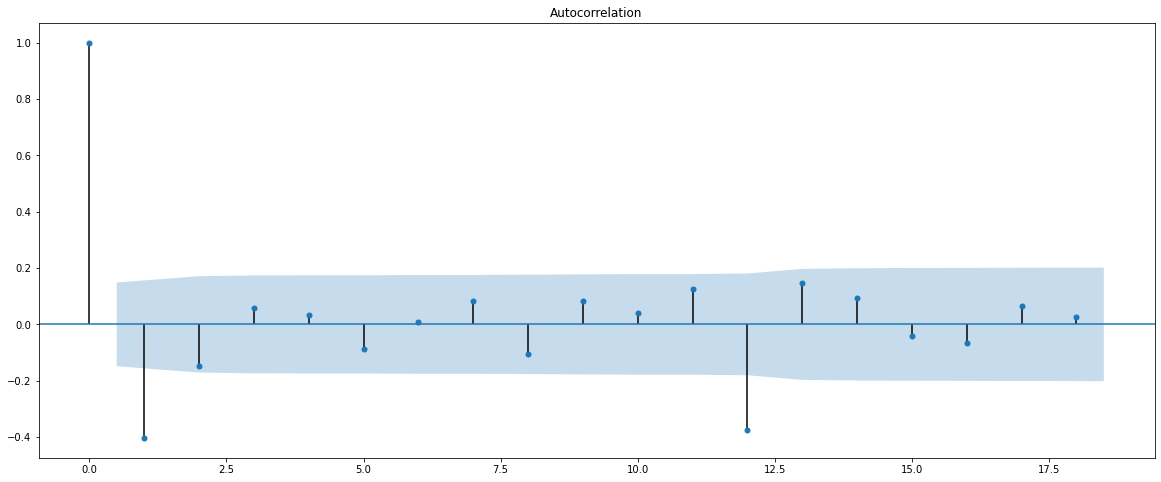

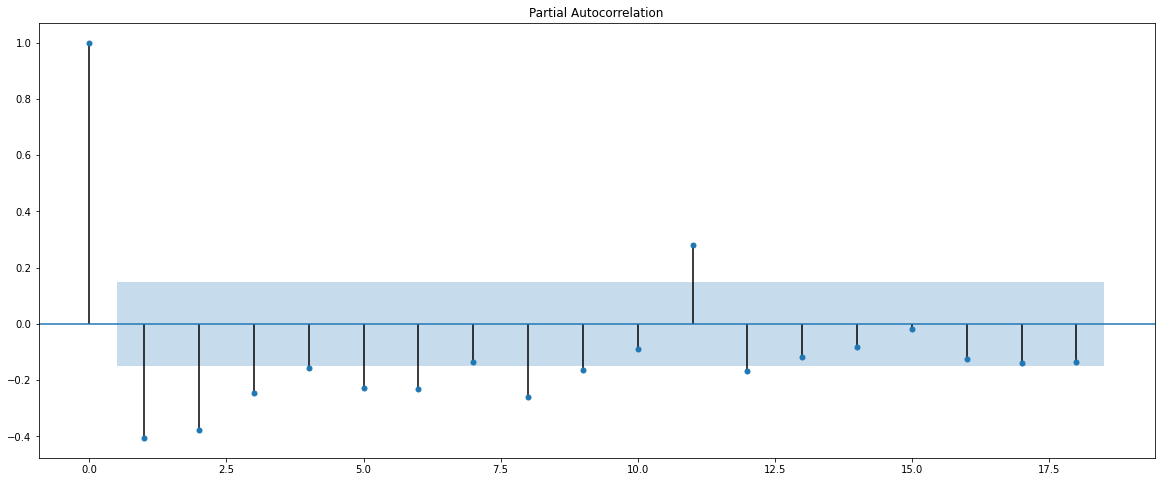

In [101]:
plot_acf((df['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=18)
plot_pacf((df['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=18);

In [103]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(6, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(6, 1, [1], 12)   Log Likelihood                -341.024
Date:                              Mon, 07 Sep 2020   AIC                            704.047
Time:                                      20:21:44   BIC                            724.162
Sample:                                           0   HQIC                           711.582
                                              - 132                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7018      0.168     -4.184      0.000      -1.031      -0.373
ma.L1          0.13

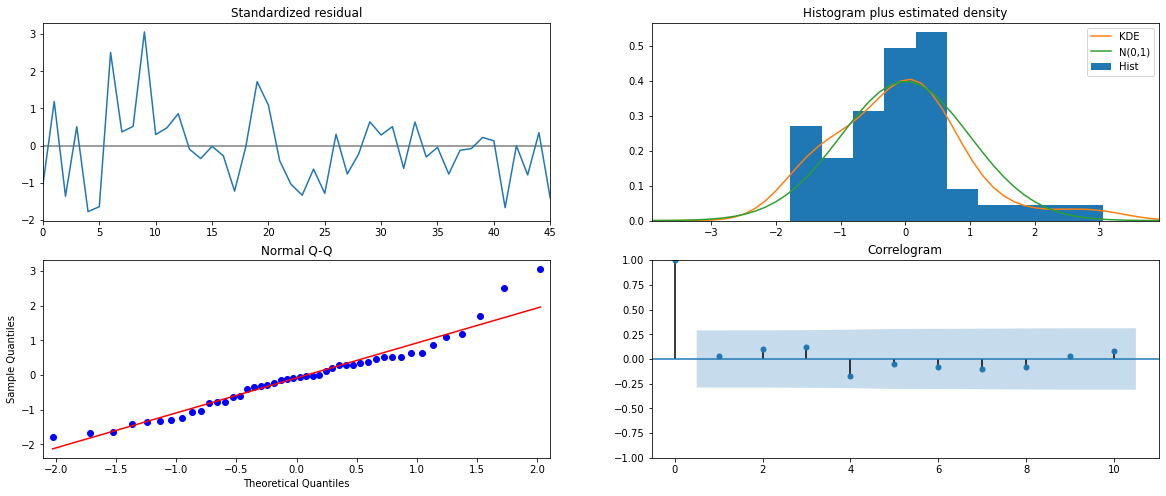

In [104]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

# Predict on the Test Set using this model and evaluate the model.

In [105]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [106]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1503.290214,373.398837,771.441942,2235.138486
1,1459.555547,404.993793,665.782298,2253.328795
2,1732.213161,404.533346,939.342373,2525.083949
3,1559.235434,418.816336,738.370499,2380.100369
4,1534.382948,419.329177,712.512863,2356.253033


In [107]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

588.1294437037059


In [108]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(6,1,1,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,2)",1374.110922
"ARIMA(3,1,2)",1378.947728
"SARIMA(1,1,2)(1,1,2,6)",613.207861
"SARIMA(1,1,2)(0,1,2,12)",382.567433
"SARIMA(1,1,2)(6,1,1,12)",588.129444


# Building the most optimum model on the Full Data.

In [126]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood               -1086.537
Date:                            Mon, 07 Sep 2020   AIC                           2185.074
Time:                                    20:49:42   BIC                           2203.017
Sample:                                01-31-1980   HQIC                          2192.364
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5602      0.367     -1.526      0.127      -1.280       0.159
ma.L1         -0.2812      0.339   

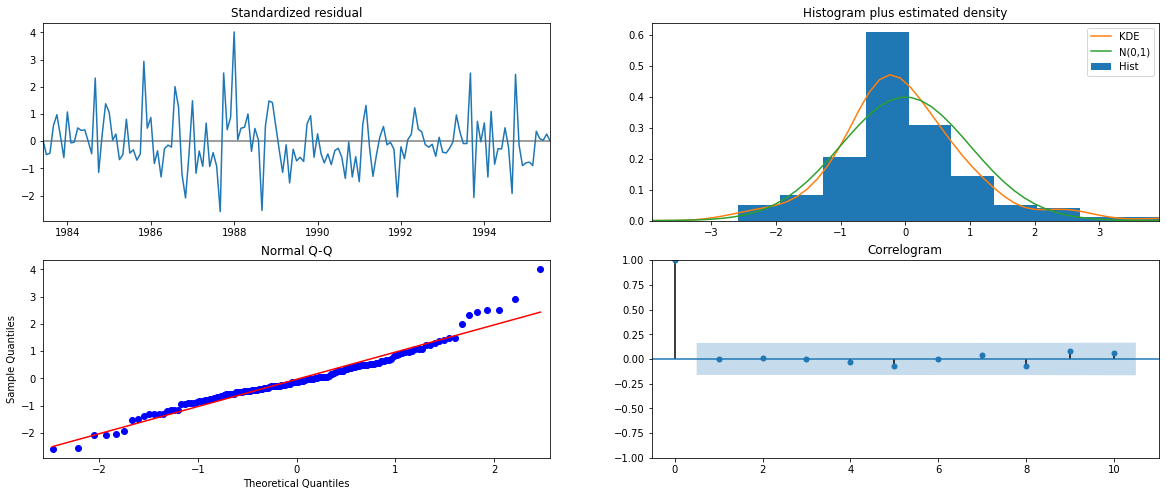

In [127]:
results_full_data_model.plot_diagnostics();

In [128]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [129]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,1869.757703,389.240043,1106.861236,2632.654170
1995-09-30,2484.478179,394.108882,1712.038963,3256.917394
1995-10-31,3294.046029,394.223896,2521.381392,4066.710666
1995-11-30,3932.864569,395.394475,3157.905639,4707.823499
1995-12-31,6131.676825,395.476025,5356.558059,6906.795590


In [130]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 555.3836840780658


In [131]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

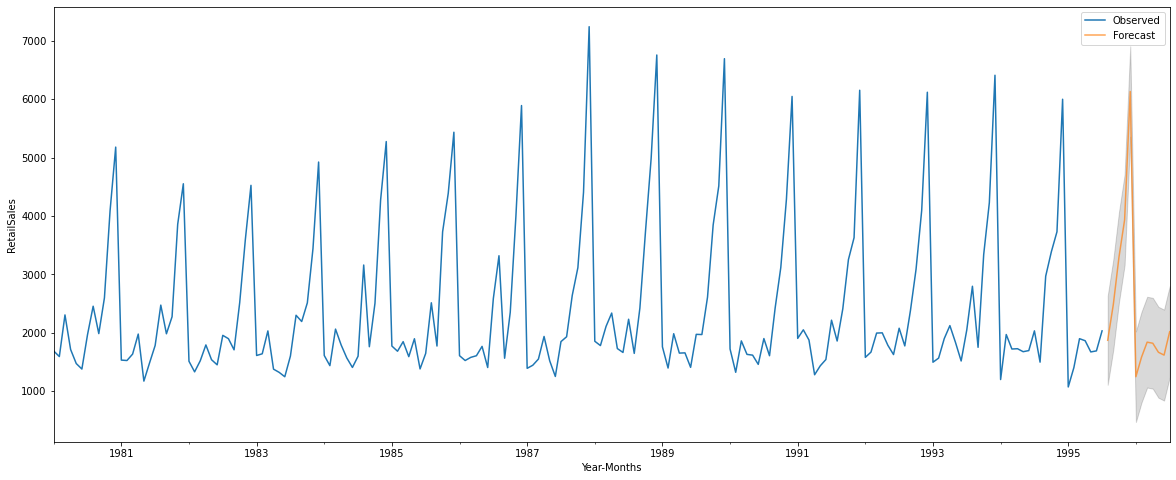

In [132]:
# plot the forecast along with the confidence band

axis = df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('RetailSales')
plt.legend(loc='best')
plt.show()

In [133]:
resultsDf

,RMSE
"ARIMA(2,1,2)",1374.110922
"ARIMA(3,1,2)",1378.947728
"SARIMA(1,1,2)(1,1,2,6)",613.207861
"SARIMA(1,1,2)(0,1,2,12)",382.567433
"SARIMA(1,1,2)(6,1,1,12)",588.129444
